<a href="https://colab.research.google.com/github/1122131uhi/1122131_DataAnalytics/blob/master/part2_2_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first thing we have to do in this part is import the data. It is in a CSV format. 

This is a list of countries on OECD data for Life Satisfaction. Please note that not all countries are listed or have data. Life Satisfaction is given by a score from 0-10. Also, there is merged data with the IMF’s data for GDP per capita head where applicable. Please note, there are many more countries available here.

In [1]:
# import a CSV file of life satisfaction data.
# ls will contain the data from the csv in a dataframe format that allows us to work with it using R.
ls <- read.csv("https://raw.githubusercontent.com/1122131uhi/dataAnalytics/master/LifeSatisfactionData.csv")

Having opened the file, we can start to examine the contents. Note this command shows the first 6 records in the dataset.

In [2]:
# examine the imported dataset
head(ls)

LOCATION Country   Value GDPPerCapita
1 AUS      Australia 7.3   48899.12    
2 AUT      Austria   7.1   48004.66    
3 BEL      Belgium   6.9   45046.94    
4 BRA      Brazil    6.5   15241.73    
5 CAN      Canada    7.4   46437.16    
6 CHL      Chile     6.5   24112.94

Another command which helps us explore the descriptive statistics is summary. 

This provides the basic statistics for each variable such as the mean and median, the minimum and maximum values, and the quartiles. In this example the dataset has a limited number of variables so we can look at all of them (hence the dataset name in the brackets). If we had a larger dataset we could specify the variables we wanted to summarise in the brackets.

In [3]:
summary(ls)

    LOCATION       Country       Value        GDPPerCapita   
 AUS    : 1   Australia: 1   Min.   :5.100   Min.   : 15242  
 AUT    : 1   Austria  : 1   1st Qu.:5.975   1st Qu.: 29218  
 BEL    : 1   Belgium  : 1   Median :6.550   Median : 39508  
 BRA    : 1   Brazil   : 1   Mean   :6.567   Mean   : 41450  
 CAN    : 1   Canada   : 1   3rd Qu.:7.300   3rd Qu.: 48308  
 CHE    : 1   Chile    : 1   Max.   :7.600   Max.   :104003  
 (Other):30   (Other)  :30                                   

In order to get some more meaningful information from the data it is useful to look at the relationship between the variables. A good way to do this is using graphics. The plot() function provides us with a scatterplot of the satisfaction score (Value) against the GDP Per Capita (GDPPerCapita).It is useful to note here that the $ symbol denotes the specific column in the ls dataset.



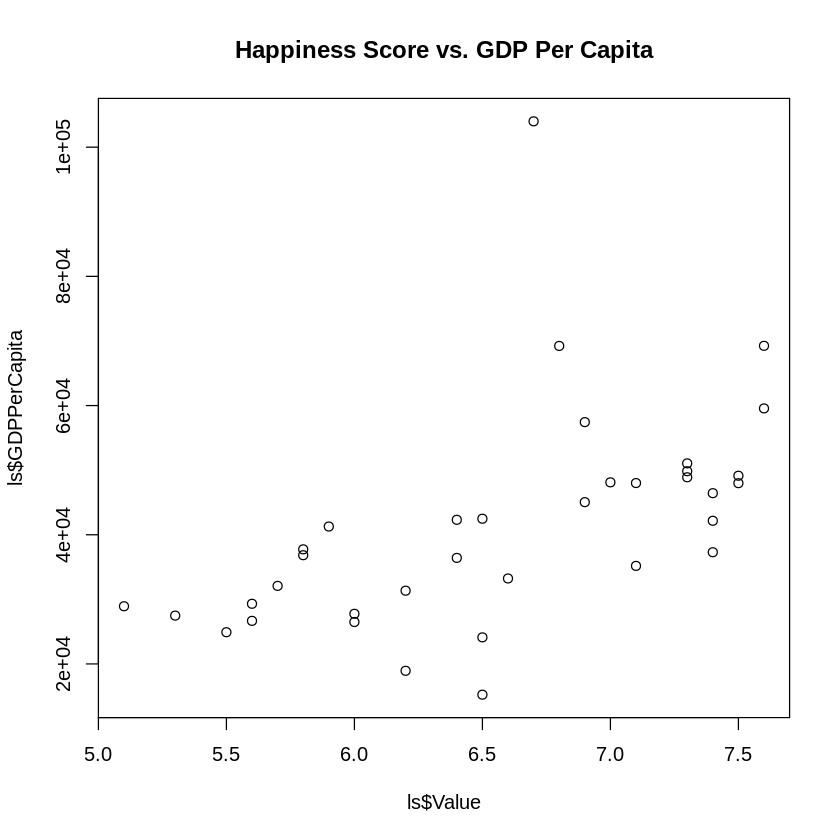

In [ ]:
# plot Value(happiness score) vs. GDPPerCapita
plot(ls$Value, ls$GDPPerCapita, main="Happiness Score vs. GDP Per Capita")

The graphical representation of the relationship between these two variables (above) suggests a weak positive correlation. Each circle on the plot represents the satisfaction score and the GDP per capita.

We can explore this further using statistical analysis. Although the relationship is not purely linear, a linear regression is a good place to begin statistical modelling. In R this uses the lm() function.

In [ ]:
# Fitting a linear regression model
results <- lm(ls$GDPPerCapita ~ ls$Value)

In [ ]:
# Display the results calculated above using the lm() function.
results


Call:
lm(formula = ls$GDPPerCapita ~ ls$Value)

Coefficients:
(Intercept)     ls$Value  
     -39432        12317  


The resulting intercept and slope values are -39432 and 12317, respectively. 

Using the summary() function on these results, the results are expanded.

In [ ]:
summary(results)


Call:
lm(formula = ls$GDPPerCapita ~ ls$Value)

Residuals:
   Min     1Q Median     3Q    Max 
-25387  -5873   -577   3394  60911 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -39432      21765  -1.812  0.07887 .  
ls$Value       12317       3295   3.738  0.00068 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14260 on 34 degrees of freedom
Multiple R-squared:  0.2913,	Adjusted R-squared:  0.2705 
F-statistic: 13.98 on 1 and 34 DF,  p-value: 0.0006805


The statistical analysis confirms the relationship between the two variables. The P value shows a significance to 0.001. This is strongly significant. 

The output gives a helpful way to interpret the significance of the results using the asterisks and explains the levels of significance underneath.

Let's further investigate the fitted model using a histogram of the residuals (Note: a residual is ‘the difference between the observed value of the dependent variable (y) and the predicted value(ŷ))

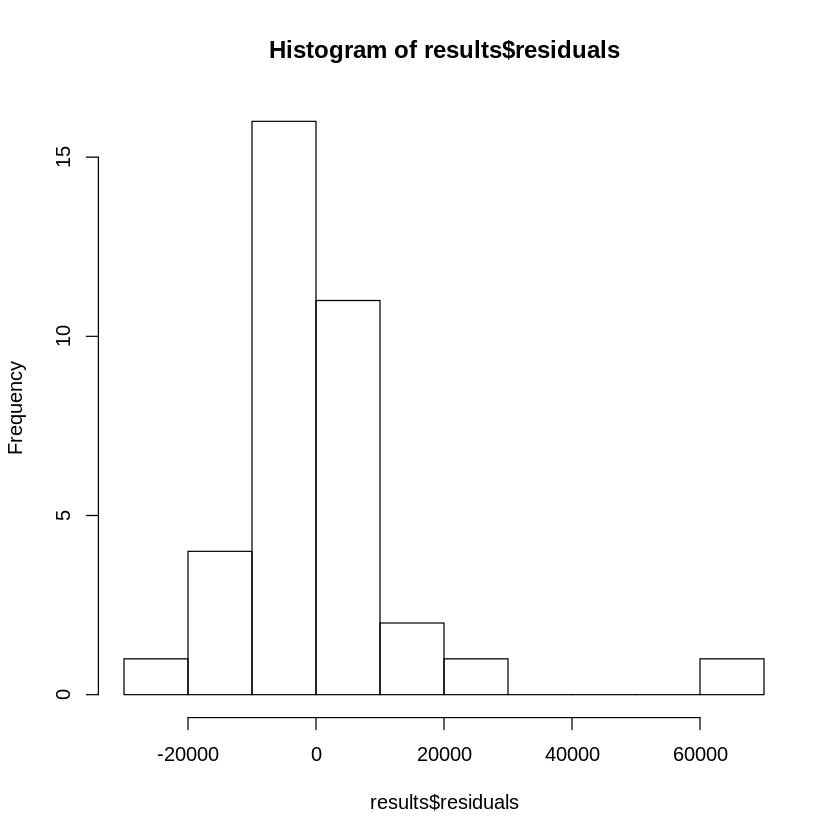

In [ ]:
hist(results$residuals, breaks =8)

The above are some of the basics that will help you get started in any data analytics process on this course. Let's move on to some more information about R.

**Attributes and Data Types**

The variables in datasets can vary by characteristic. They are generally split into those with qualitative attributes (categorical) or quantitative attributes (numeric). Those grouped as categorical are Nominal where the values are labels that distinguish one from another such as gender or postcode, or Ordinal where the values imply a hierarchy such as educational qualifications. The numeric variables are either Interval, where there is a meaningful difference between values such as dates or temperatures, or Ratio, where both the difference and the ratio of two values are meaningful, for instance age or weight. It is worth considering the operations that are viable for how each of your variables are stored (e.g. are calculations possible; the use of less than < or equals to=).

It is not out of the ordinary to convert variables from one attribute type to another and this can be useful when preparing data for statistical analysis. Age, for example, can be converted from ratio into ordinal (categorical such as pre-school, primary school, high school, adult etc.). However, it IS important to realise that the types of variable influence the techniques that are suitable for meaningful analysis. Think about asking R for the mean or median of a student ID number....it doesn’t make sense.

**Data Types: Numeric, Character, and Logical**

Here are some examples of how R supports different variable values:

*  i <- 1 (numeric variable)
*  newspaper <- “Times” (character variable)
*  red <- TRUE (logical variable)

R allows the user to explore the variables using functions such as ‘class()’ and ‘typeof()’.

There are other data types such as Vectors, Arrays and Matrices, but we will mainly focus on data frames which was created by the read.csv command we used at the start of this section and as noted we access variables in it using $ notation.

Data frames are the preferred input format for many of the modelling function in R because of their flexibility to handle many data types. Using the str() function provides the structure of the life satisfaction data frame.





In [ ]:
# display the structure of the life satisfaction data frame
str(ls)

'data.frame':	36 obs. of  4 variables:
 $ LOCATION    : Factor w/ 36 levels "AUS","AUT","BEL",..: 1 2 3 4 5 7 8 10 12 13 ...
 $ Country     : Factor w/ 36 levels "Australia","Austria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Value       : num  7.3 7.1 6.9 6.5 7.4 6.5 6.6 7.5 5.6 7.4 ...
 $ GDPPerCapita: num  48899 48005 45047 15242 46437 ...


This identifies num data types, factor variables and levels. 

Data frames are basically lists of variables of the same length. 

A subset of a data frame can be obtained through creating subsets. These subsetting operators allow you to express complex operations and retrieve a subset of the dataset easily.

In [ ]:
# extract the fourth column of the life satisfaction data frame
ls[,4]

[1]  48899.12  48004.66  45046.94  15241.73  46437.16  24112.94  33231.52
 [8]  47985.37  29312.90  42164.60  42313.99  48110.85  26669.10  27481.79
[15]  49135.58  69230.82  35178.67  36833.09  41274.61  37740.40 104003.30
[22]  18938.32  51049.02  37293.98  69249.46  27764.26  28933.32  26489.82
[29]  31338.81  32084.87  36415.96  49836.22  59560.69  24911.75  42480.71
[36]  57436.41

In [ ]:
# export the GDPPerCapita column of the life satisfaction data frame
ls$GDPPerCapita

[1]  48899.12  48004.66  45046.94  15241.73  46437.16  24112.94  33231.52
 [8]  47985.37  29312.90  42164.60  42313.99  48110.85  26669.10  27481.79
[15]  49135.58  69230.82  35178.67  36833.09  41274.61  37740.40 104003.30
[22]  18938.32  51049.02  37293.98  69249.46  27764.26  28933.32  26489.82
[29]  31338.81  32084.87  36415.96  49836.22  59560.69  24911.75  42480.71
[36]  57436.41

In [ ]:
# retrieve the first two rows of the data frame
ls[1:2,]

LOCATION Country   Value GDPPerCapita
1 AUS      Australia 7.3   48899.12    
2 AUT      Austria   7.1   48004.66

In [ ]:
# retrieve the first, third and fourth columns
ls[,c(1, 3, 4)]

LOCATION Value GDPPerCapita
1  AUS      7.3    48899.12   
2  AUT      7.1    48004.66   
3  BEL      6.9    45046.94   
4  BRA      6.5    15241.73   
5  CAN      7.4    46437.16   
6  CHL      6.5    24112.94   
7  CZE      6.6    33231.52   
8  DNK      7.5    47985.37   
9  EST      5.6    29312.90   
10 FIN      7.4    42164.60   
11 FRA      6.4    42313.99   
12 DEU      7.0    48110.85   
13 GRC      5.6    26669.10   
14 HUN      5.3    27481.79   
15 ISL      7.5    49135.58   
16 IRL      6.8    69230.82   
17 ISR      7.1    35178.67   
18 ITA      5.8    36833.09   
19 JPN      5.9    41274.61   
20 KOR      5.8    37740.40   
21 LUX      6.7   104003.30   
22 MEX      6.2    18938.32   
23 NLD      7.3    51049.02   
24 NZL      7.4    37293.98   
25 NOR      7.6    69249.46   
26 POL      6.0    27764.26   
27 PRT      5.1    28933.32   
28 RUS      6.0    26489.82   
29 SVK      6.2    31338.81   
30 SVN      5.7    32084.87   
31 ESP      6.4    36415.96   
32 SWE      7.3    49836.22   
33 CHE      7.6    59560.69   
34 TUR      5.5    24911.75   
35 GBR      6.5    42480.71   
36 USA      6.9    57436.41

In [ ]:
# retrieve both the LOCATION and Country columns
ls[,c("LOCATION", "Country")]

LOCATION Country        
1  AUS      Australia      
2  AUT      Austria        
3  BEL      Belgium        
4  BRA      Brazil         
5  CAN      Canada         
6  CHL      Chile          
7  CZE      Czech Republic 
8  DNK      Denmark        
9  EST      Estonia        
10 FIN      Finland        
11 FRA      France         
12 DEU      Germany        
13 GRC      Greece         
14 HUN      Hungary        
15 ISL      Iceland        
16 IRL      Ireland        
17 ISR      Israel         
18 ITA      Italy          
19 JPN      Japan          
20 KOR      Korea          
21 LUX      Luxembourg     
22 MEX      Mexico         
23 NLD      Netherlands    
24 NZL      New Zealand    
25 NOR      Norway         
26 POL      Poland         
27 PRT      Portugal       
28 RUS      Russia         
29 SVK      Slovak Republic
30 SVN      Slovenia       
31 ESP      Spain          
32 SWE      Sweden         
33 CHE      Switzerland    
34 TUR      Turkey         
35 GBR      United Kingdom 
36 USA      United States

In [ ]:
# retrieve all the records whose Value is greater than 6
ls[ls$Value > 6,]

LOCATION Country         Value GDPPerCapita
1  AUS      Australia       7.3    48899.12   
2  AUT      Austria         7.1    48004.66   
3  BEL      Belgium         6.9    45046.94   
4  BRA      Brazil          6.5    15241.73   
5  CAN      Canada          7.4    46437.16   
6  CHL      Chile           6.5    24112.94   
7  CZE      Czech Republic  6.6    33231.52   
8  DNK      Denmark         7.5    47985.37   
10 FIN      Finland         7.4    42164.60   
11 FRA      France          6.4    42313.99   
12 DEU      Germany         7.0    48110.85   
15 ISL      Iceland         7.5    49135.58   
16 IRL      Ireland         6.8    69230.82   
17 ISR      Israel          7.1    35178.67   
21 LUX      Luxembourg      6.7   104003.30   
22 MEX      Mexico          6.2    18938.32   
23 NLD      Netherlands     7.3    51049.02   
24 NZL      New Zealand     7.4    37293.98   
25 NOR      Norway          7.6    69249.46   
29 SVK      Slovak Republic 6.2    31338.81   
31 ESP      Spain           6.4    36415.96   
32 SWE      Sweden          7.3    49836.22   
33 CHE      Switzerland     7.6    59560.69   
35 GBR      United Kingdom  6.5    42480.71   
36 USA      United States   6.9    57436.41

In [ ]:
# find the class of the data frame
class(ls)

[1] "data.frame"

**2.1.1 Descriptive Statistics**

We have seen that the summary() function gives several descriptive statistics. However, there are some common R functions that include descriptive statistics.

In [ ]:
# export the Value column of the life satisfaction data frame into x
x <- ls$Value;
# export the GDPPPerCapita column of the life satisfaction data frame into y
y <- ls$GDPPerCapita;

In [ ]:
# returns correlation
cor(x, y)

[1] 0.5397372

In [ ]:
# returns covariance
cov(x, y)

[1] 6594.87

In [ ]:
# returns the interquartile range
IQR(x)

[1] 1.325

In [ ]:
# returns the mean
mean(x)

[1] 6.566667

In [ ]:
# returns the median
median(x)

[1] 6.55

In [ ]:
# returns the range
range(x)

[1] 5.1 7.6

In [ ]:
# returns the standard deviation
sd(x)

[1] 0.7317298

In [ ]:
# returns the variance
var(x)

[1] 0.5354286

The IQR() function provides the difference between the first and third quartiles. You should look up these functions and understand what they are and what they mean if you don’t already know.

The apply() function can be used when the same function is applied to several variables in a data frame. So, lets calculate the standard deviation for the last two variables in ls.

In [ ]:
apply(ls[,c(3:4)], MARGIN=2, FUN=sd);

Value GDPPerCapita 
7.317298e-01 1.669833e+04

Additional descriptive statistics can be applied using user-defined functions. The following code shows a function called myFunc and it will calculate the difference between the maximum and minimum values returned by the range function.

In [ ]:
myFunc <- function(v) { range(v)[2] - range(v)[1]}
myFunc(x)

[1] 2.5

**2.1.2 Exploratory Data Analysis**

We have been learning about descriptive statistics where functions like summary() can help you get an idea of the magnitude and range of the data, but it’s difficult to understand other aspects such as linear relationships and distributions. The best way to do this is to visualise the data where it is much easier to detect patterns and anomalies. So, it allows us to assess the data cleanliness and suggests potentially important relationships in the data prior to planning and building the model.

A good example of why it is very important to visualise data is to consider Anscombe’s quartet. Where we have the following 4 datasets. The datasets have nearly identical statistical properties:

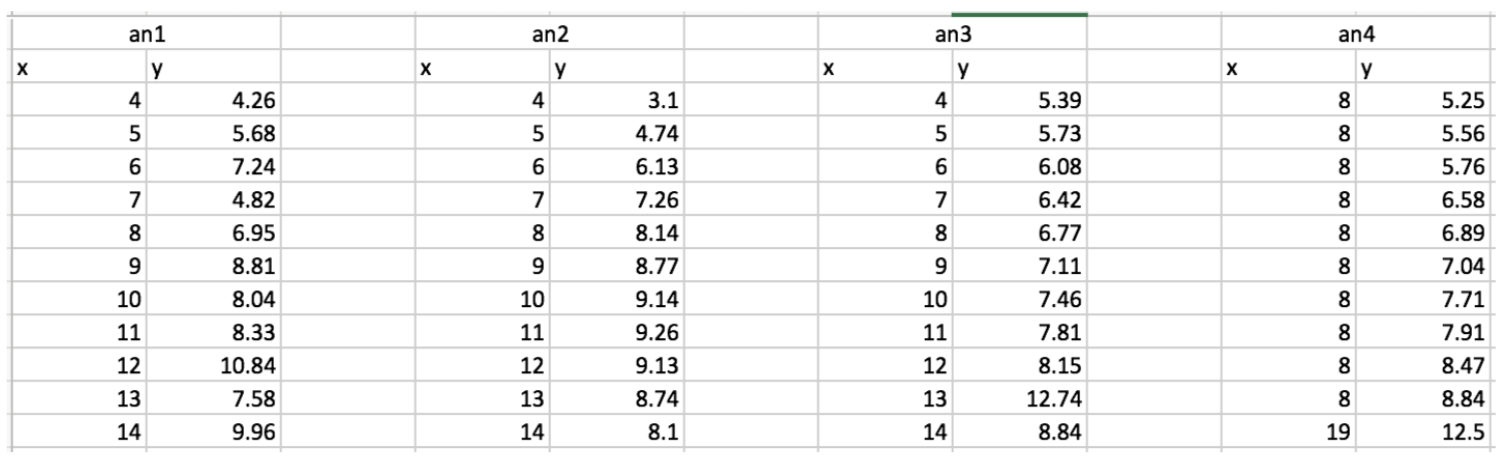

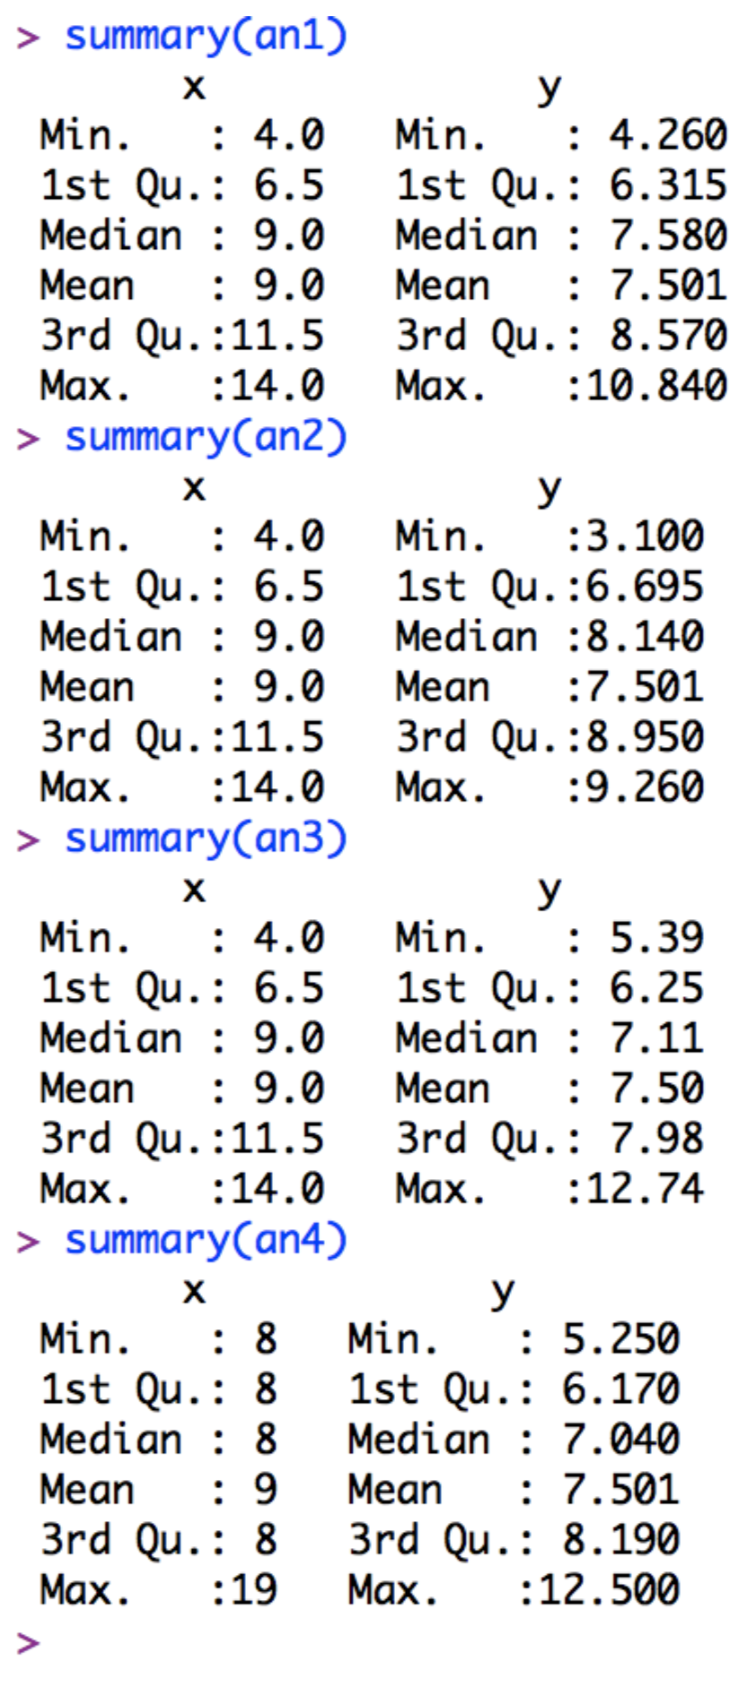

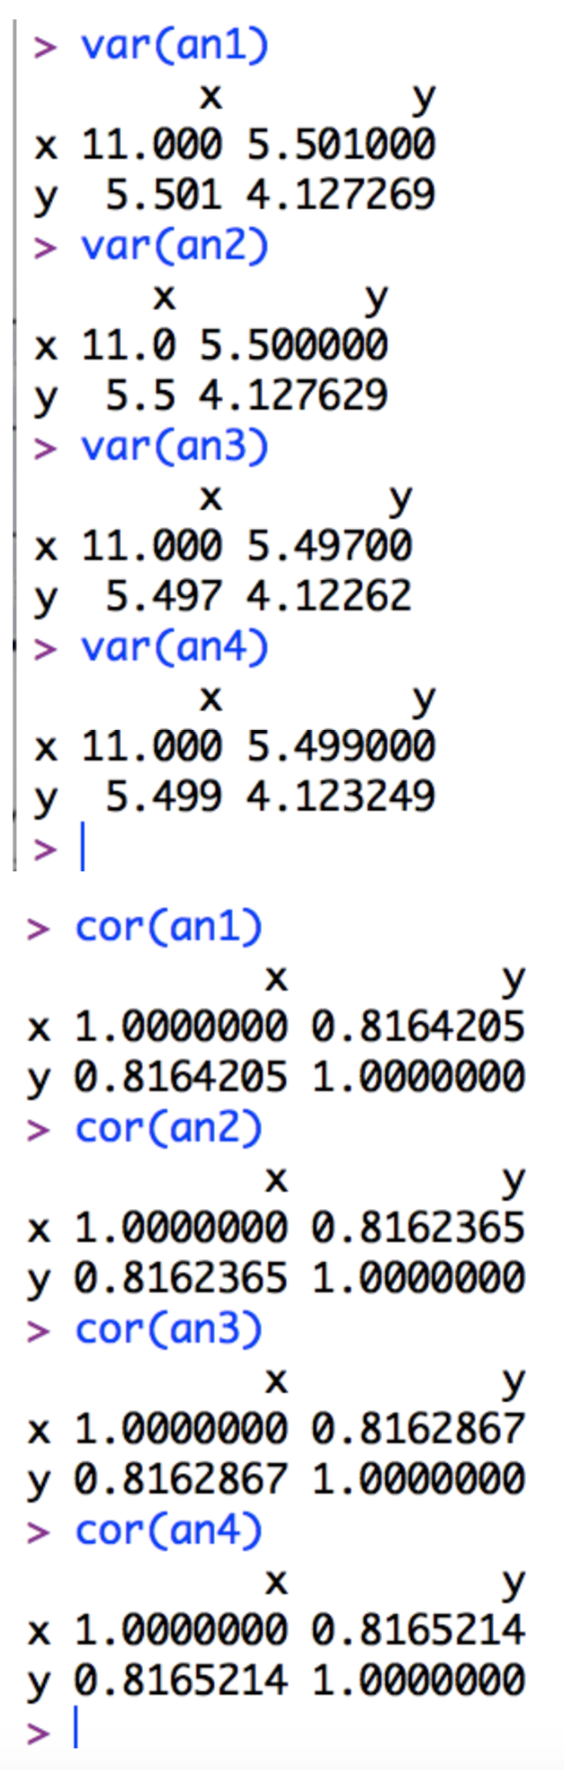

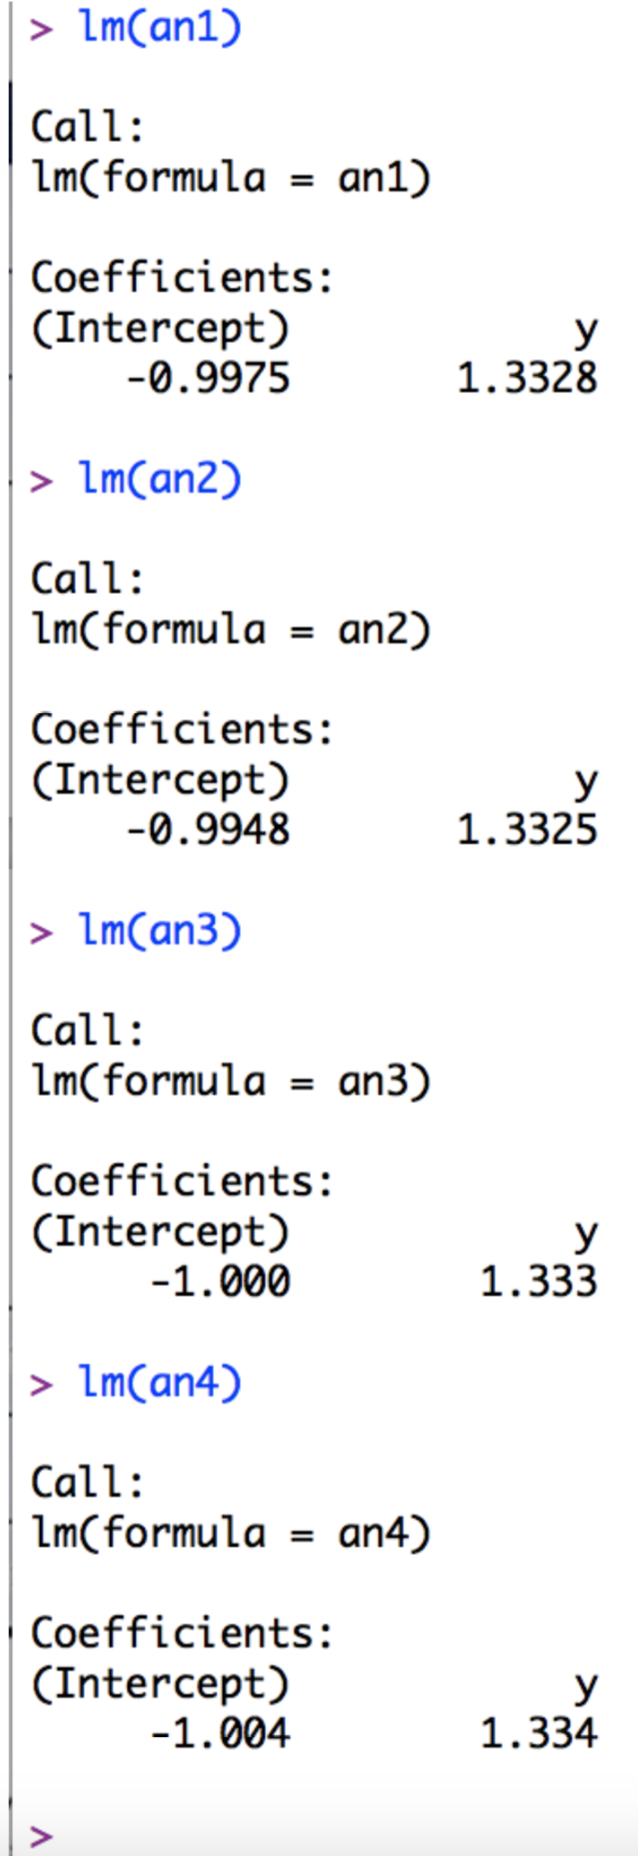

Since the statistical properties across each dataset are nearly identical, you could assume the four datasets are quite similar. However, as you can see in the scatter plots below, where there are fitted lines from a linear regression model, Dataset 1 is good, Dataset 2 is nonlinear, Dataset 3 has a linear trend with a clear outlier and Dataset 4 fits the data quite well (however, only with 2 points so we cannot make a proper assumption of linearity).

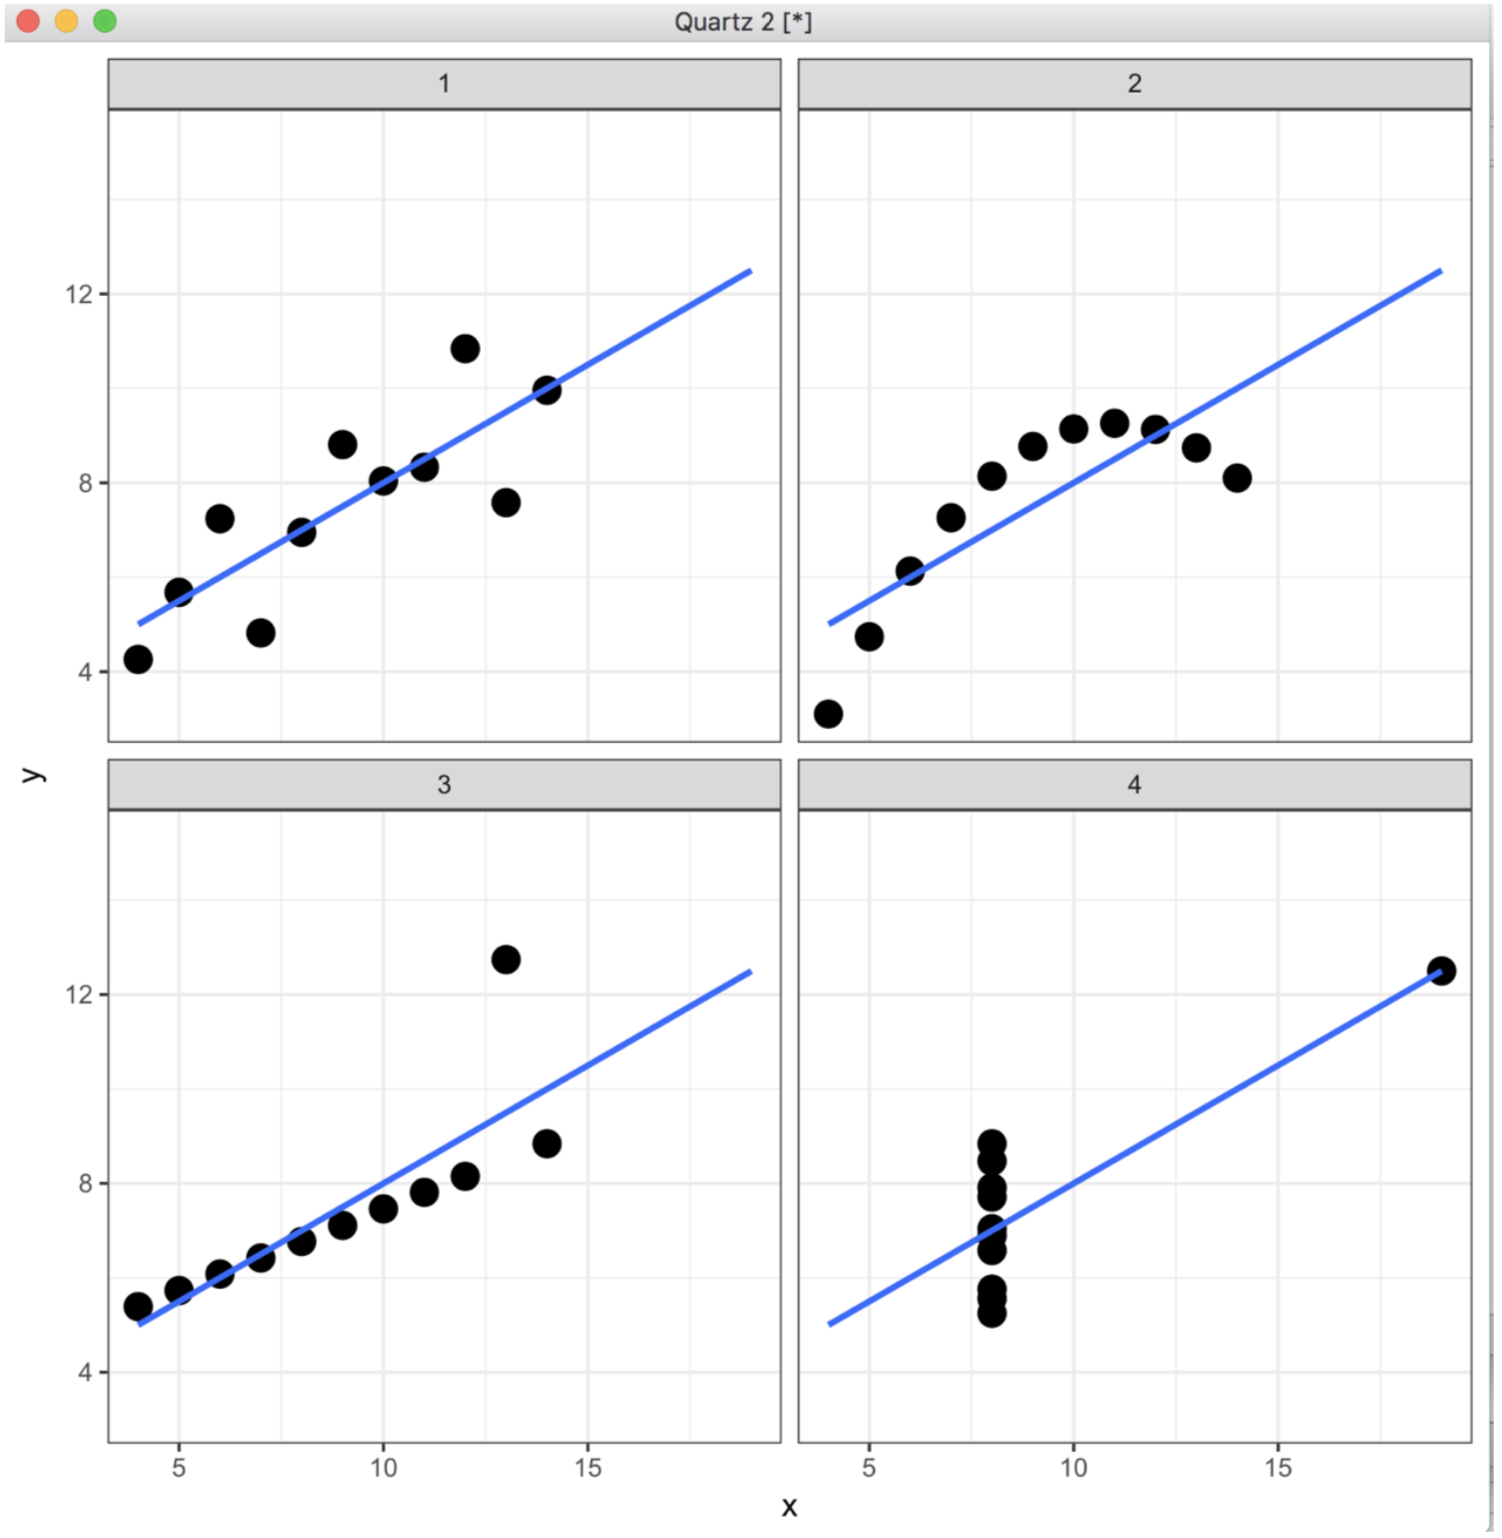

Although I write about this later and discuss it many times, visualising data can be very useful for identifying dirty data. In the California Housing case study discussed in later parts, there are several caps applied to particular variables and missing data in the form of nulls. This can easily be viewed in a plot, such as a histogram. A clear example of dirty data (that needs to be cleaned) would be visualising bank account holders by age in a histogram that counts frequency. You may be doing this to assess customer retention. Things that could easily be noted as dirty data are high occurrences of account owners younger than 0 (where null is sometimes given the value -1 in historical coding conventions) or accounts well over the age of 100 (with a high frequency). There are perhaps reasons for both, and they should probably be looked further into. If nulls exist we can still do some work with these using the following functions:

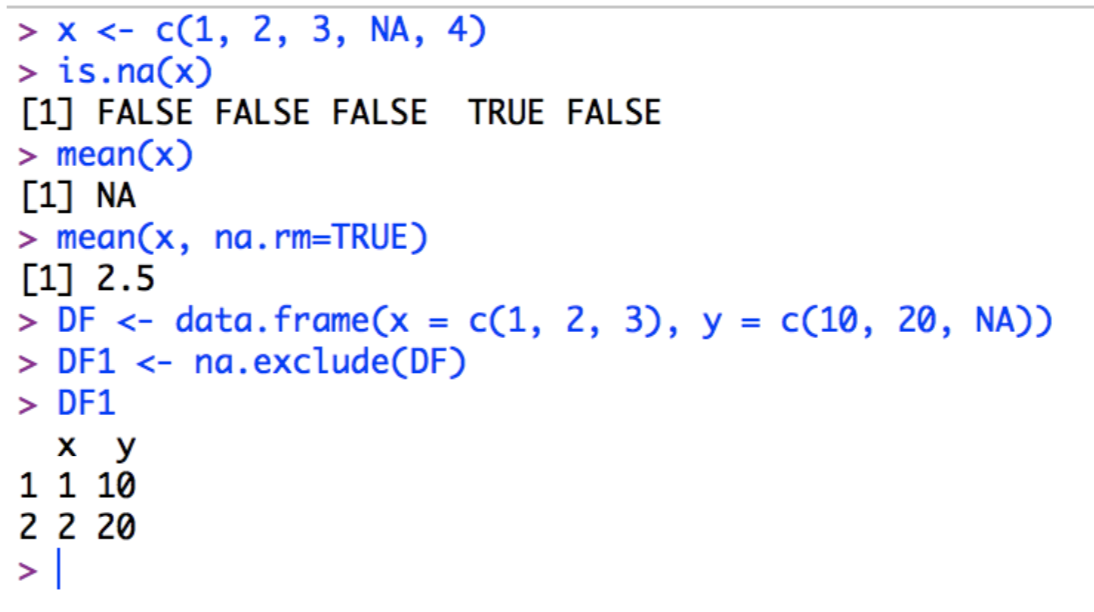

x is a vector with the values, 1, 2, 3, NA and 4. We can check if any of the values are nulls with is.na(x) which shows the values, FALSE, FALSE, FALSE, TRUE and FALSE (obviously). If we try to obtain the mean over all values a null is returned, so we can exclude null by using, mean(x, na.rm=TRUE)
Finally, DF is a data frame with the vectors shown. In y there is one NA. We can use the exclude funtion as shown above, to exclude the null values i.e. the row that includes the null.
We have seen a few examples of plotting single variables so far and later you will see some interesting use of plotting multiple variables that you should be able to use.
Here are some plots you will most likely be using, they are based on the California Housing data you will be using later:



In [4]:
# import california housing data
hd <- read.csv("https://raw.githubusercontent.com/1122131uhi/dataAnalytics/master/housing_original.csv");

In [5]:
# examine the imported dataset
head(hd)

longitude latitude housing_median_age total_rooms total_bedrooms population
1 -122.23   37.88    41                  880         129            322      
2 -122.22   37.86    21                 7099        1106           2401      
3 -122.24   37.85    52                 1467         190            496      
4 -122.25   37.85    52                 1274         235            558      
5 -122.25   37.85    52                 1627         280            565      
6 -122.25   37.85    52                  919         213            413      
  households median_income median_house_value ocean_proximity
1  126       8.3252        452600             NEAR BAY       
2 1138       8.3014        358500             NEAR BAY       
3  177       7.2574        352100             NEAR BAY       
4  219       5.6431        341300             NEAR BAY       
5  259       3.8462        342200             NEAR BAY       
6  193       4.0368        269700             NEAR BAY

plot(data) produces a scatter plot where x is the index and y is the value. This is suitable for low- volume data. We will use this with opacity for high volume data to easily visualise density in later parts.

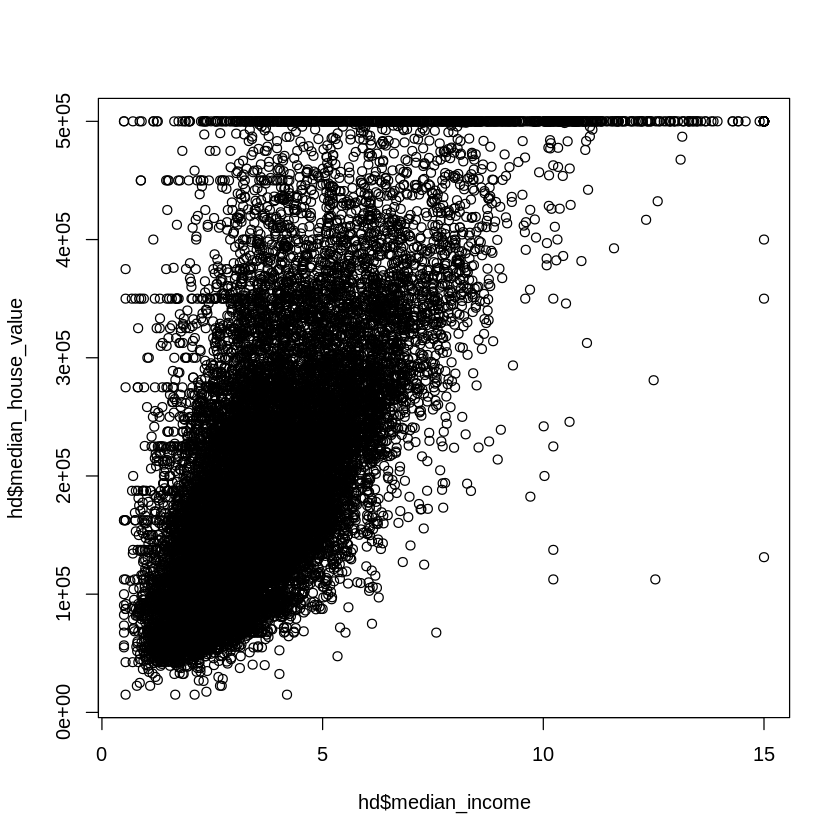

In [ ]:
plot(hd$median_income, hd$median_house_value)

hist(data), creates a histogram. You can apply different breaks and obtain better detail of the distribution.

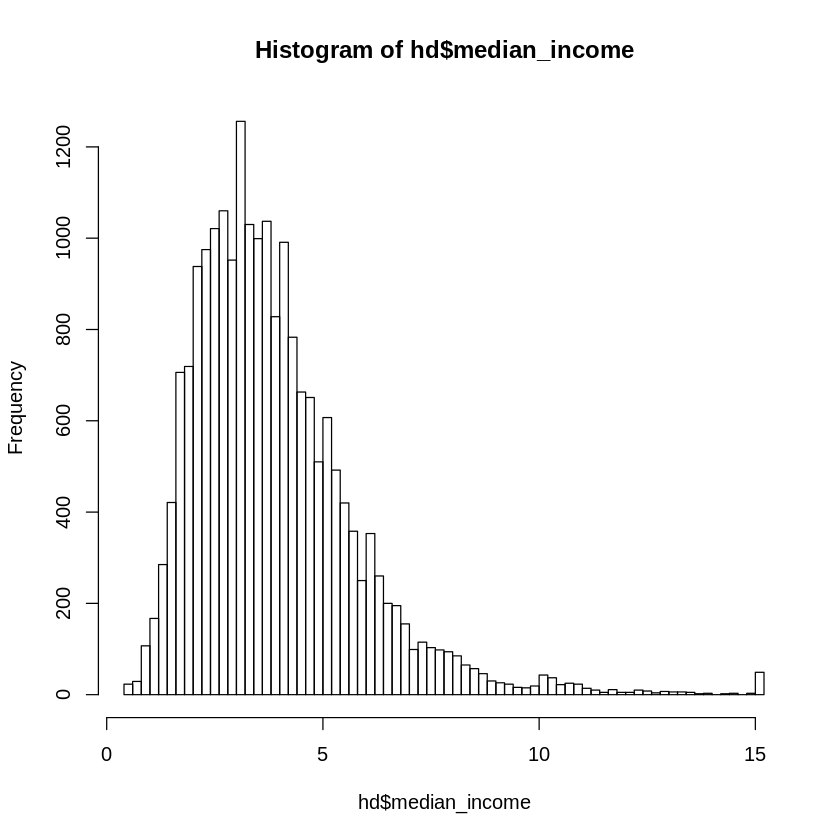

In [ ]:
hist(hd$median_income, breaks = 100)

plot(density(data)) – creates a denisty plot (i.e. a continuous histogram)


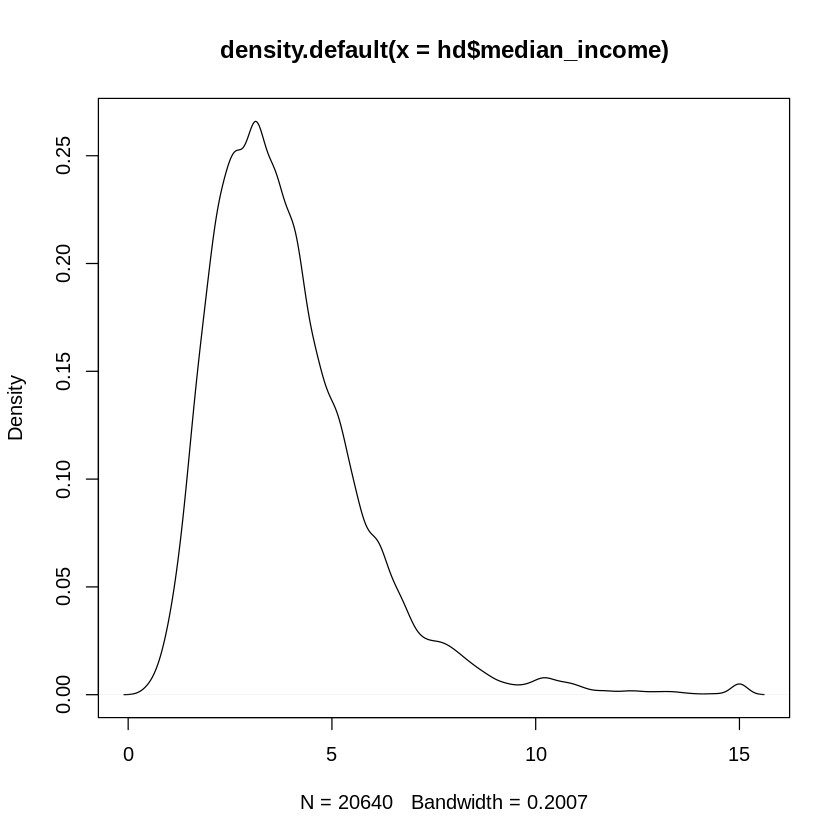

In [ ]:
plot(density(hd$median_income))

The last plot I am going to show you is nothing new, but I want to addresst this point here. It is about data transformation and we touch on this at different points throughout the module. For linear and logistic regression we want to make sure that the relationship between input variables and output variables are approximately linear, that the input variables are approximately normal in distribution, and that the output variable is constant variabce (i.e. the variance of the output variable is independent of the input variables). So we may (at points) need to transform some of the input variables to better meet these assumptions. So below, I have used a log_10 (log base 10) transformation of the data above, to change the distribution from being skewed to the left, to having a normal distribution.

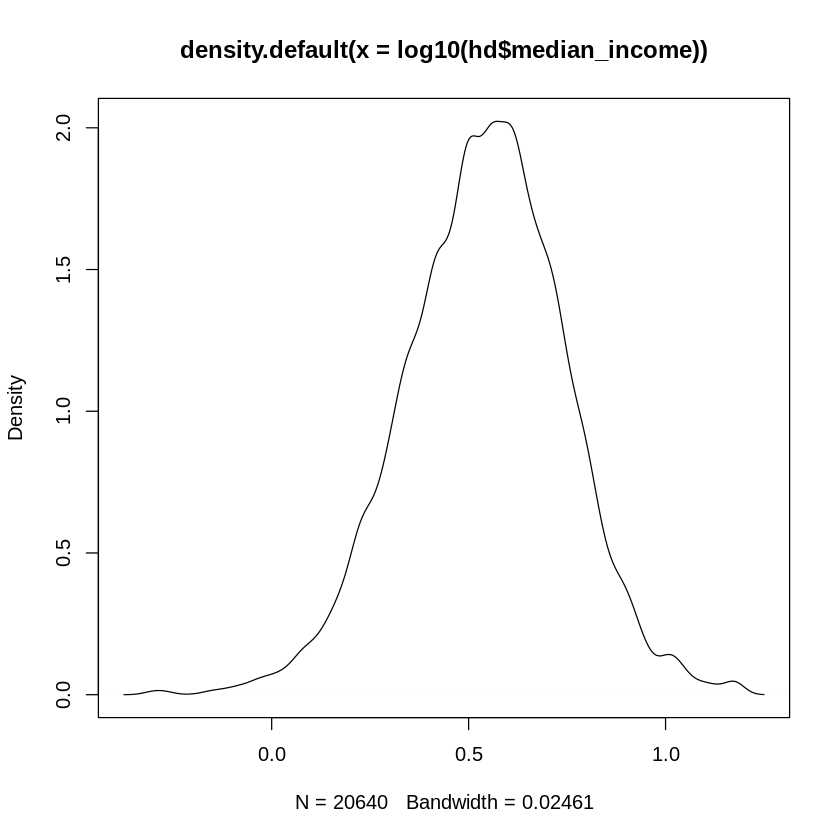

In [ ]:
plot(density(log10(hd$median_income)))

There are some other cool things we can do, such as scatterplot matrices which show many scatterplots in a compact, side-by-side fashion. This allows us to explore any relationships, magnify differences and disclose hidden patterns.

This can be achieved with the pairs() function as shown below:

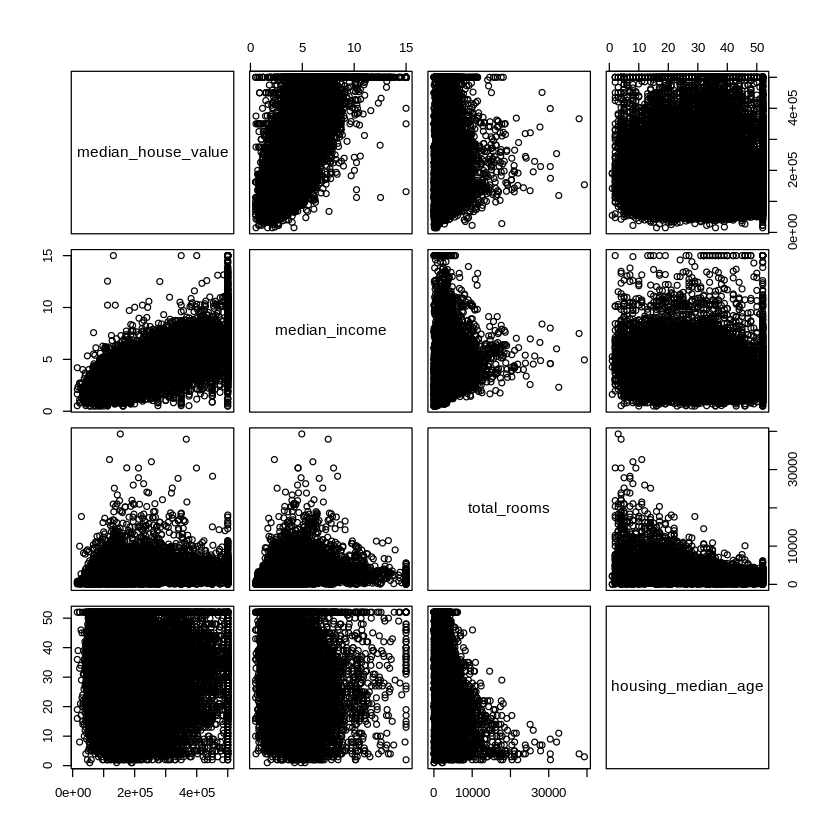

In [ ]:
scattermatrix = data.frame(median_house_value = hd$median_house_value, median_income = hd$median_income, total_rooms = hd$total_rooms, housing_median_age = hd$housing_median_age)
pairs(scattermatrix[,1:4])

***Useful for your assignment**

At this point, I would like to address analysing a variable over time. In the tutorials we are using the classic taxi-fare example where we are trying to build a system that can accurately predict the the number of trips on a given day of the week. The data we have is from 2013. In your assignment you will have data from a number of years perhaps before 2013 up until around the present day. So, I would like to address the seasonality effect. 

Let's visualise the day of the year vs the number of trips in a scatter plot:

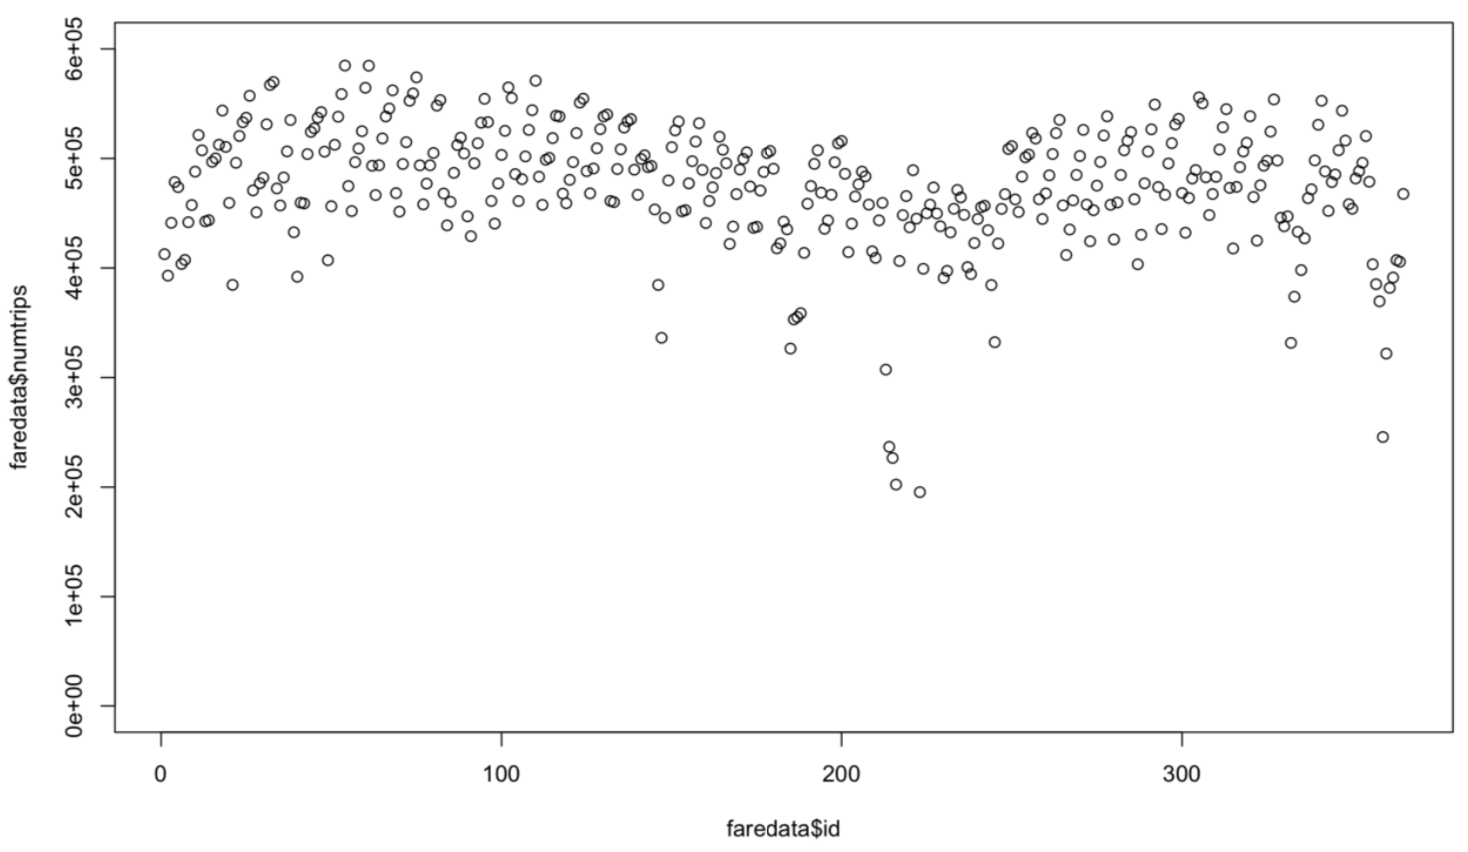


From the plot, we can see that around the start of the year, the number of trips is low, then there is a peak shortly after, where the trend starts show less trips at around day 200, then there is a sharp increase again, where it then dips sligtly at the end of the year. In this data, the maximum number of trips is 584812 and the minimum is 195405. Now, although we cant be sure in this case as we don’t have the data, but in 2014, lets say this general shape still holds true, but the general number of trips increases across the board, then 2015 the same again, then 2016 again. Where, if we plotted all of the data we would get something that resembles the following:

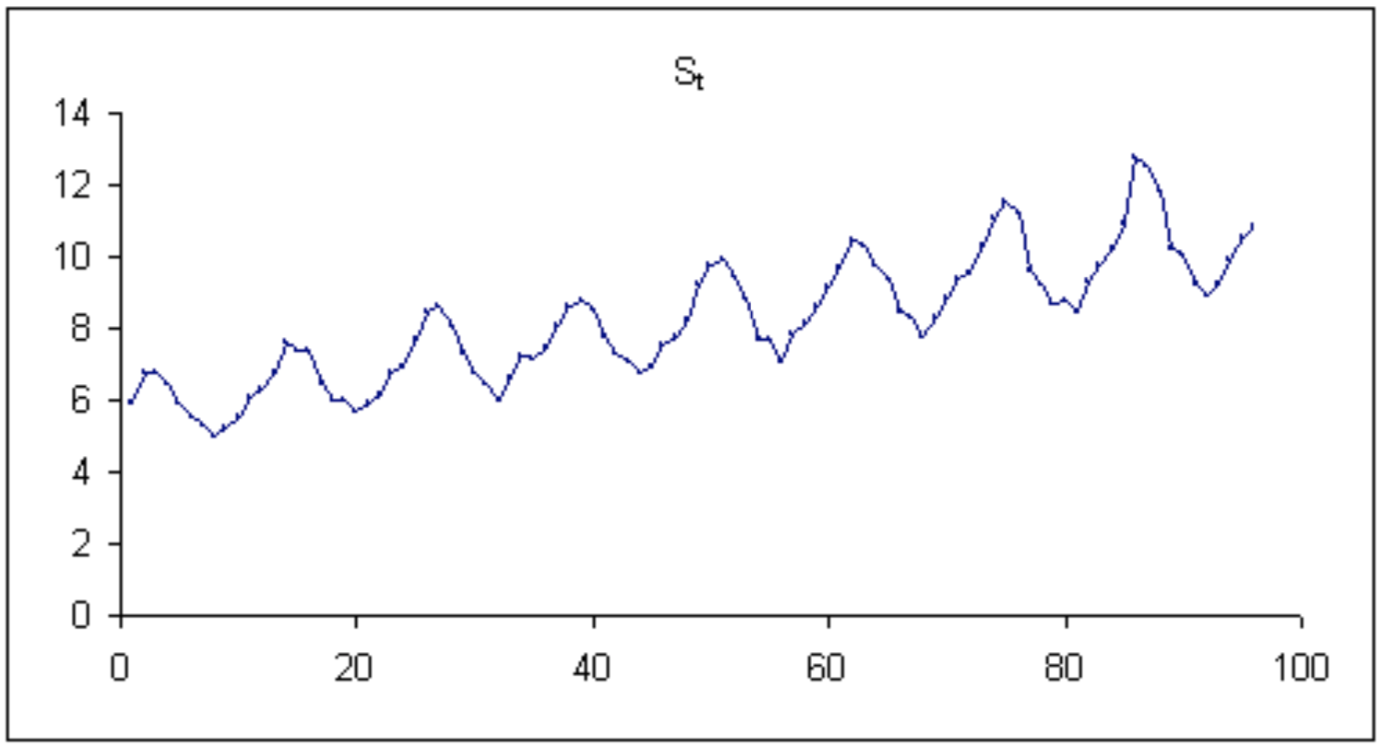

(http://www.epixanalytics.com/modelassist/AtRisk/images/15/image606.gif)

Now, solving this issue is rather difficult. Do we take the values from each year and proportionalise against the maximum and minimum for example? Do we consider another factor, such as population and/or the number of tourists (which both tend to increase in new york) and allow our system train using these values? These are just some general factors I wanted to raise, as I think that you must consider these issues in your model. Also, as a point, I was sitting with a colleague doing amazing work using machine learning and a classification task with 3D models of animals and I thought about a possible way to improve this model. If we take into consideration the variability over each dayid i.e. 1 for a Monday, 7 for a Sunday, it might be that the range of number of trips on a given day is extremely variable due to what month it is. So, for example, in December and January, a particular day is likely to be much less than one in April. Perhaps categorising the data further by month would give a better model. I don’t do this in my example tutorials, but perhaps you should when doing them to see. I would be very interested in your results.

**Return back to the course document for 2.2**